In [59]:
from skimage import measure
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [123]:
def get_CCA_from_image(image, threshold = 115, show_image=False):
    img = cv2.imread(image,0)
    h,w = img.shape[:2]

    # plt.show()
    if show_image:
        fig,ax = plt.subplots(1)
    # ax.imshow(img,cmap='gray')

    L = measure.label(img)
    # print "Number of components:", np.max(L)
    # print L

    ret, thresh = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    
    output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)

    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]

#     print num_labels
#     print labels, len(labels)
#     print stats
#     print centroids

    # cv2.imshow('image',img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # put a red dot, size 40, at 2 locations:
    # plt.scatter(x=[centroids[0][0], centroids[1][0]], y=[centroids[0][1], centroids[1][1]], c='r', s=40)
    # ax2 = plt.add_subplot(111, aspect='equal')
    max_area_index=-1
    for i in range(len(stats)):
        if stats[i][0]==0 and stats[i][1]==0:
            continue
        if show_image:
            ax.add_patch(
                patches.Rectangle(
                    (stats[i][0], stats[i][1]),
                    stats[i][2],
                    stats[i][3],
                    fill=False,      # remove background
                    color='red'
                )
            )
        if max_area_index==-1:
            max_area_index=i
        elif stats[i][4] > stats[max_area_index][4]:
            max_area_index=i
            
    # fig2.savefig('rect2.png', dpi=90, bbox_inches='tight')
    if show_image:
        ax.imshow(thresh, cmap='gray')
        plt.show()
    #crop
    chosen_box = thresh[stats[max_area_index][1]:stats[max_area_index][1]+stats[max_area_index][3],stats[max_area_index][0]:stats[max_area_index][0]+stats[max_area_index][2]]
    return stats[max_area_index], chosen_box


In [159]:
def get_ratio_of_image(img):
    #ratio of white to black
    a=cv2.countNonZero(img)
    h,w = img.shape[:2]
#     print type(float(a))
#     print (float(h)*float(w))
    return float(float(a)/(float(h)*float(w)))

In [316]:
def get_best_threshold(img_filename, start=80, max_steps = 30, alpha=1):
    min_ratio = float("inf")
    index = -1
    final_chosen_box = None
    final_stats = []
    thresholds = np.arange(start,start+max_steps,alpha)
    for i in thresholds:
        stats, chosen_box = get_CCA_from_image(img_filename, i, show_image=True)
        ratio = get_ratio_of_image(chosen_box)
        if ratio < min_ratio:
            min_ratio = ratio
            index = i
            final_chosen_box = chosen_box
            final_stats = stats
    return index, final_chosen_box, final_stats

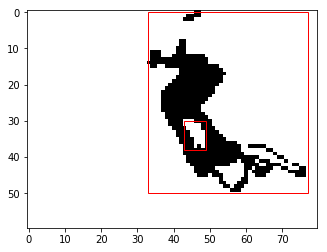

(array([ 33,   0,  44,  50, 511], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ..., 
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [358]:
# index, chosen_box, stats = get_best_threshold('dataset-2/rgb67.jpg')
get_CCA_from_image('dataset-2/rgb67.jpg', 100, show_image=True)
# plt.imshow(chosen_box, cmap="gray")
# plt.show()

In [342]:
def get_chosen_box_and_stats(img_filename, threshold):
    stats, chosen_box = get_CCA_from_image(img_filename, threshold, show_image=False)
    return chosen_box, stats

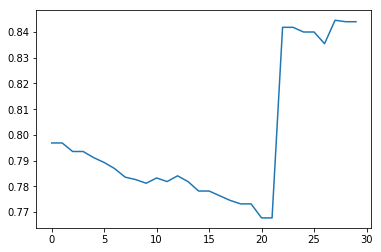

In [353]:
ratios = []
for i in np.arange(80,110,1):
    stats, chosen_box = get_CCA_from_image('dataset-2/rgb67.jpg', i, show_image=False)
    ratios.append(get_ratio_of_image(chosen_box))
plt.plot(ratios)

In [340]:
test_images = [('dataset-2/rgb66.jpg', 91),'dataset-2/rgb67.jpg',('dataset-2/rgb69.jpg', 80),
              ('dataset-4/rgb8.jpg', 40), ('dataset-4/rgb9.jpg', 40), ('dataset-4/rgb10.jpg', 60),
              ('dataset-4/rgb26.jpg', 60)]

In [344]:
def get_original_image_cropped(image, stats):
    return image[stats[1]:stats[1]+stats[3],stats[0]:stats[0]+stats[2]]

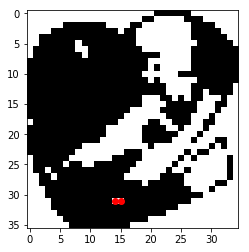

In [259]:
image, contours, hierarchy = cv2.findContours(chosen_box, cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
x=[]
y=[]
# print contours
for i in contours[0]:
    x.append(i[0][0])
    y.append(i[0][1])
    plt.imshow(image,cmap='gray')

plt.plot(x, y, 'ro')
plt.show()

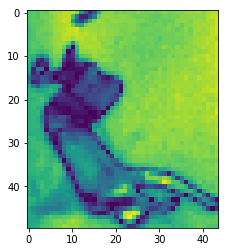

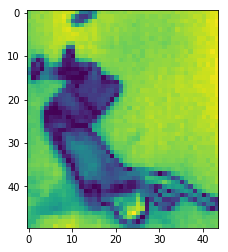

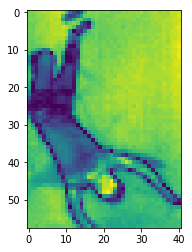

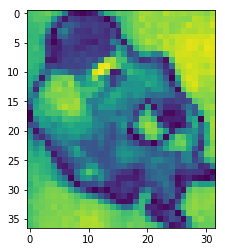

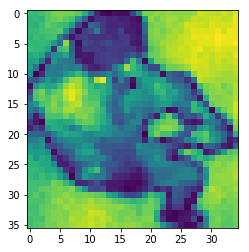

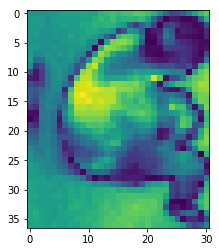

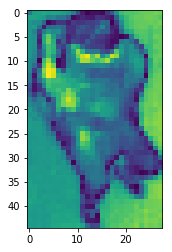

[[  1.13704497e-03]
 [  2.13151638e-08]
 [  4.51205145e-12]
 [  3.53978812e-11]
 [ -8.00231495e-23]
 [ -1.48218025e-15]
 [ -4.40140170e-22]]
[[  1.08270716e-03]
 [  1.79330471e-08]
 [  4.85175494e-12]
 [  3.22704749e-11]
 [  3.12496978e-24]
 [ -2.67986611e-16]
 [ -4.03779678e-22]]
[[  1.16921400e-03]
 [  1.92511125e-07]
 [  2.15182006e-11]
 [  3.04022878e-11]
 [  2.12655585e-22]
 [  4.91603625e-16]
 [ -7.47968191e-22]]
[[  1.55628656e-03]
 [  1.11849185e-07]
 [  8.67297845e-12]
 [  1.57748742e-11]
 [  1.08557222e-22]
 [  4.18586393e-15]
 [ -1.49202280e-22]]
[[  1.47139827e-03]
 [  4.28135353e-08]
 [  6.55370272e-12]
 [  5.53064067e-12]
 [ -3.15231436e-23]
 [  1.14434104e-15]
 [ -1.07232883e-23]]
[[  1.43830866e-03]
 [  1.24595881e-07]
 [  8.48439803e-11]
 [  2.75749833e-12]
 [ -3.24834250e-23]
 [  9.02790469e-16]
 [  2.69033393e-23]]
[[  1.72216441e-03]
 [  4.99482238e-07]
 [  3.61281431e-11]
 [  3.27307325e-12]
 [ -3.53629980e-23]
 [ -2.31250821e-15]
 [ -4.03388969e-24]]


In [361]:
boxes = []
moments = []
use_original_images = True
for i in test_images:
    if type(i) == tuple:
        filename = i[0]
        chosen_box, stats  = get_chosen_box_and_stats(i[0],i[1])
    else:
        filename = i
        threshold, chosen_box, stats = get_best_threshold(i)
    if use_original_images:
        chosen_box_thermal = get_original_image_cropped(cv2.imread(filename,0), stats)
        boxes.append(chosen_box_thermal)
        plt.imshow(chosen_box_thermal)
        plt.show()
    else:
        boxes.append(chosen_box)
        plt.imshow(chosen_box)
        plt.show()
for j in boxes:
    moments.append(cv2.moments(j))
for l in moments:
    print cv2.HuMoments(l)

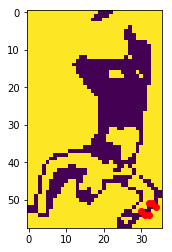

In [ ]:
pl